In [1]:
# Example code for creating a figure of suitable size
# for inclusion in the term paper.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandasql as ps

plt.rcParams['axes.titlesize'] = 9
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['text.usetex'] = True


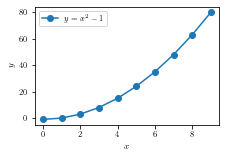

In [15]:
def new_figure(height=55):
    "Return figure with width 84mm and given height in mm."
    return plt.figure(figsize=(84/25.4, height/25.4))

x = range(10)
y = [v**2 - 1 for v in x]

fig = new_figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, 'o-', label='$y=x^2-1$')
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
fig.savefig('sample_plot.pdf', bbox_inches='tight')

In [7]:
merge_sort_already_sorted= pd.read_csv("merge_sort_already_sorted.csv")
merge_sort_random= pd.read_csv("merge_sort_random.csv")
merge_sort_reverse_sorted= pd.read_csv("merge_sort_reverse_sorted.csv")

quick_sort_random= pd.read_csv("quick_sort_random.csv")

heap_sort_already_sorted= pd.read_csv("heap_sort_already_sorted.csv")
heap_sort_random= pd.read_csv("heap_sort_random.csv")
heap_sort_reverse_sorted= pd.read_csv("heap_sort_reverse_sorted.csv")

numpy_sort_already_sorted= pd.read_csv("numpy_sort_already_sorted.csv")
numpy_sort_random= pd.read_csv("numpy_sort_random.csv")
numpy_sort_reverse_sorted= pd.read_csv("numpy_sort_reverse_sorted.csv")

python_sorted_already_sorted= pd.read_csv("sorted_already_sorted.csv")
python_sorted_random= pd.read_csv("sorted_random.csv")
python_sorted_reverse_sorted= pd.read_csv("sorted_reverse_sorted.csv")                 


In [8]:
dataset=pd.concat([merge_sort_already_sorted, merge_sort_random, merge_sort_reverse_sorted, 
                   quick_sort_random,
                   heap_sort_already_sorted, heap_sort_random, heap_sort_reverse_sorted,
                   numpy_sort_already_sorted, numpy_sort_random, numpy_sort_reverse_sorted,
                   python_sorted_already_sorted, python_sorted_random, python_sorted_reverse_sorted])
dataset.head()

,Sort_Type,Data_Type_or_List_type,List_length,Runtimes,Number_of_repeatitions,Datetime
0,merge_sort,already_sorted,10,0.267837,7,2019-11-01 21:51:45.110982
1,merge_sort,already_sorted,10,0.277732,7,2019-11-01 21:51:45.110982
2,merge_sort,already_sorted,10,0.274984,7,2019-11-01 21:51:45.110982
3,merge_sort,already_sorted,10,0.250366,7,2019-11-01 21:51:45.110982
4,merge_sort,already_sorted,10,0.233188,7,2019-11-01 21:51:45.110982


In [9]:
# Extract the keys and values and plot them

min_query = """SELECT Sort_Type, 
Data_Type_or_List_type,
List_length, 
min( Runtimes/Number_of_repeatitions)  as Single_runtime
FROM dataset 
GROUP BY Sort_Type, 
Data_Type_or_List_type,
List_length """

df_min = pd.DataFrame( ps.sqldf(min_query) )
df_min.head()

,Sort_Type,Data_Type_or_List_type,List_length,Single_runtime
0,heap_sort,already_sorted,10,0.027820
1,heap_sort,already_sorted,20,0.038298
2,heap_sort,already_sorted,40,0.039827
3,heap_sort,already_sorted,80,0.030248
4,heap_sort,already_sorted,160,0.036558


In [35]:
filter = ( df_min['Sort_Type']=='heap_sort') &  (df_min['Data_Type_or_List_type']=='random')
plot_this=df_min[filter]
plot_this

,Sort_Type,Data_Type_or_List_type,List_length,Single_runtime
0,<built-in function sorted>,random,10,0.025212
1,<built-in function sorted>,random,20,0.022808
2,<built-in function sorted>,random,40,0.027359
3,<built-in function sorted>,random,80,0.024186
4,<built-in function sorted>,random,160,0.063721
5,<built-in function sorted>,random,320,0.063690
6,<built-in function sorted>,random,640,0.035269
7,<built-in function sorted>,random,1280,0.037996
8,<built-in function sorted>,random,2560,0.041246
9,<built-in function sorted>,random,5120,0.027516


In [79]:
plot_lower_half=plot_this[(plot_this['List_length']<=10240)]
plot_lower_half

,Sort_Type,Data_Type_or_List_type,List_length,Single_runtime
0,<built-in function sorted>,random,10,0.025212
1,<built-in function sorted>,random,20,0.022808
2,<built-in function sorted>,random,40,0.027359
3,<built-in function sorted>,random,80,0.024186
4,<built-in function sorted>,random,160,0.063721
5,<built-in function sorted>,random,320,0.063690
6,<built-in function sorted>,random,640,0.035269
7,<built-in function sorted>,random,1280,0.037996
8,<built-in function sorted>,random,2560,0.041246
9,<built-in function sorted>,random,5120,0.027516


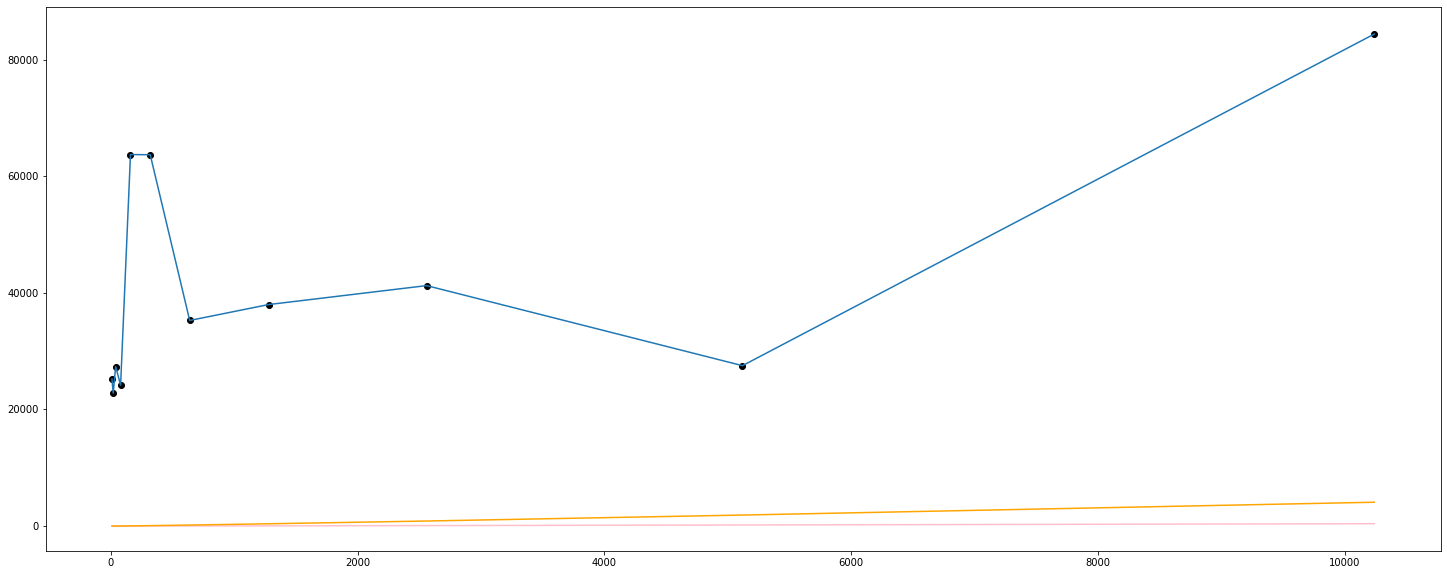

In [84]:
# Prove that the graph in NlogN
# Changing the constants by Hit and Trial
# The time in plotted in microseconds

n_log_n_small= 0.003*plot_lower_half['List_length'] * np.log2( plot_lower_half['List_length'] )
n_log_n_large= 0.03*plot_lower_half['List_length'] * np.log2( plot_lower_half['List_length'] )


plt.figure(figsize=(25,10))
plt.plot ( plot_lower_half['List_length'],  plot_lower_half['Single_runtime']*1000000)
plt.scatter  ( plot_lower_half['List_length'],  plot_lower_half['Single_runtime']*1000000, color='black')
plt.plot ( plot_lower_half['List_length'], n_log_n_small, color='pink')
plt.plot ( plot_lower_half['List_length'], n_log_n_large,   color='orange')
plt.show()

In [81]:
plot_upper_half=plot_this[(plot_this['List_length']>10240)]
plot_upper_half

,Sort_Type,Data_Type_or_List_type,List_length,Single_runtime
11,<built-in function sorted>,random,20480,0.020733
12,<built-in function sorted>,random,40960,0.049520
13,<built-in function sorted>,random,81920,0.023963
14,<built-in function sorted>,random,163840,0.050072
15,<built-in function sorted>,random,327680,0.078097
16,<built-in function sorted>,random,655360,0.164708
17,<built-in function sorted>,random,1310720,0.480583
18,<built-in function sorted>,random,2621440,0.784762
19,<built-in function sorted>,random,5242880,2.400480
20,<built-in function sorted>,random,10485760,4.395109


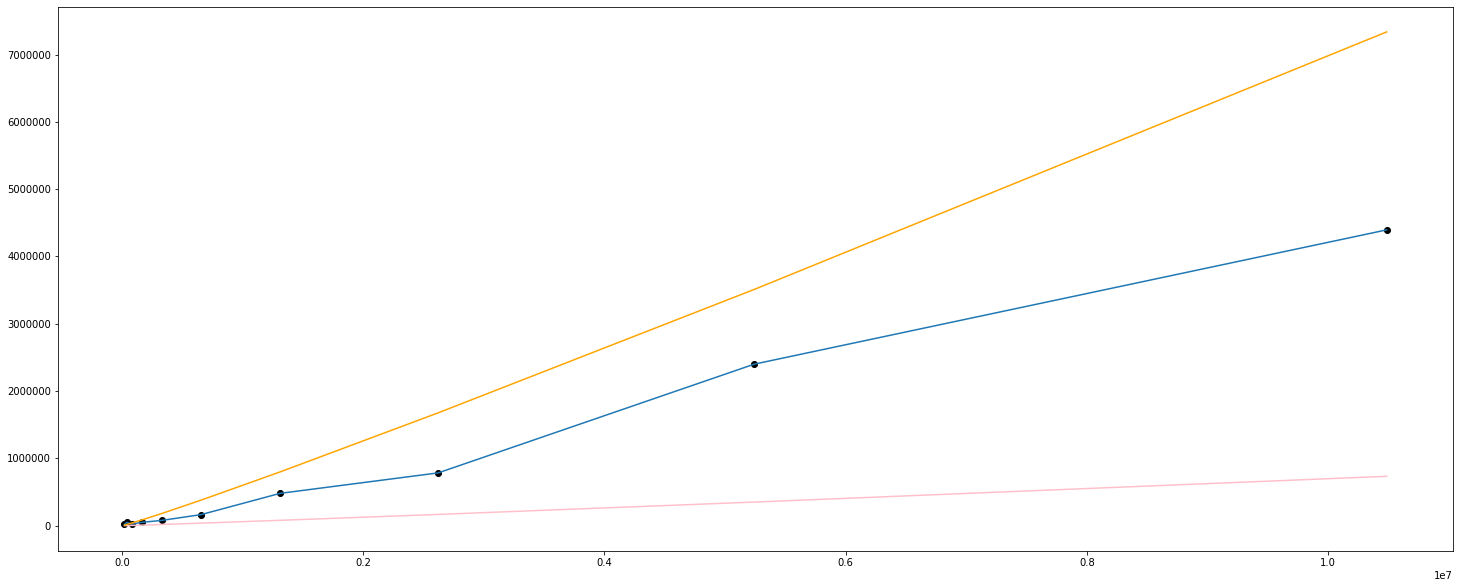

In [82]:
# Prove that the graph in NlogN
# Changing the constants by Hit and Trial
# The time in plotted in microseconds
n_log_n_small= 0.003*plot_upper_half['List_length'] * np.log2( plot_upper_half['List_length'] )
n_log_n_large= 0.03*plot_upper_half['List_length'] * np.log2( plot_upper_half['List_length'] )


plt.figure(figsize=(25,10))
plt.plot ( plot_upper_half['List_length'],  plot_upper_half['Single_runtime']*1000000)
plt.scatter  ( plot_upper_half['List_length'],  plot_upper_half['Single_runtime']*1000000, color='black')
plt.plot ( plot_upper_half['List_length'], n_log_n_small, color='pink')
plt.plot ( plot_upper_half['List_length'], n_log_n_large,   color='orange')
plt.show()

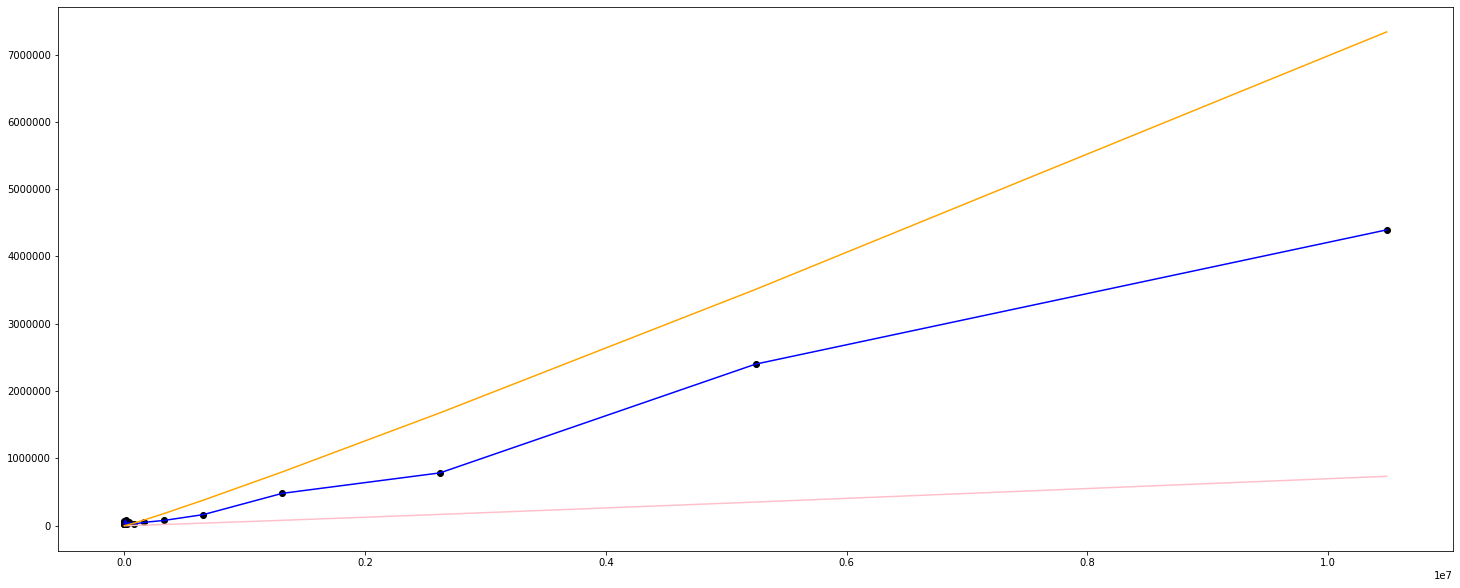

In [83]:
# Prove that the graph in NlogN
# Changing the constants by Hit and Trial
# The time in plotted in microseconds
n_log_n_small= 0.003*plot_this['List_length'] * np.log2( plot_this['List_length'] )
n_log_n_large= 0.03*plot_this['List_length'] * np.log2( plot_this['List_length'] )

plt.figure(figsize=(25,10))
plt.plot ( plot_this['List_length'],  plot_this['Single_runtime']*1000000, color='blue')
plt.scatter  ( plot_this['List_length'],  plot_this['Single_runtime']*1000000, color='black')
plt.plot ( plot_this['List_length'], n_log_n_small, color='pink')
plt.plot ( plot_this['List_length'], n_log_n_large,   color='orange')
plt.show()